# Formula 1 World Championship (1950-2021): Exploration

This dataset can be found on <a href='https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020'>Kaggle</a>.

This notebook uses plotly. Plotly orca allow to create static ploty figure. Installation with jupyter notebook support:
```bash
conda install -c plotly plotly=4.14.3
conda install -c plotly plotly-orca
conda install "notebook>=5.3" "ipywidgets>=7.5"
```

Each primary attribute is assigned a unique identifier which can be used to perform relational algebra operations. The `url` field present in many tables is a reference. This may be useful to link our website to other resources.

**Main tables (entities)**
1. Circuits
2. Races
3. Constructors
4. Drivers
**Secondary tables (relationships)**
1. Constructor results (races & constructors)
2. Constructor standings (races & constructors)
3. Driver standings (races & drivers)
4. Lap times (races & drivers)
5. Pit stops (races & drivers)
6. Qualifying (races & drivers)
7. Results (races & drivers & constructors)
**Additional tables (simple mapping)**:
1. Seasons
2. Status

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
root = '../Data'

# Main Tables (entities)

# Circuits

The `circuits.csv` file contains information about all 77 Formula 1 circuits. The primary attribute is `CircuitId`. The informative attributes are geographical coordinates, latitude `lat`, longitude `lng` and altitude `alt`. We also have the name `name`, the location `location` (i.e city) and the country. The map below shows the circuits positions on a map of the world.

In [3]:
df = pd.read_csv(os.path.join(root, 'circuits.csv'))

In [4]:
# Head
df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [5]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB


In [6]:
# Basic statistics
df.describe()

,circuitId,lat,lng,alt
count,77.000000,77.000000,77.000000,77.000000
mean,39.000000,33.720351,3.551303,247.493506
std,22.371857,22.885969,64.876679,363.267251
min,1.000000,-37.849700,-118.189000,-7.000000
25%,20.000000,33.447900,-9.203060,18.000000
50%,39.000000,41.170500,4.326940,129.000000
75%,58.000000,47.203900,19.248600,332.000000
max,77.000000,57.265300,144.968000,2227.000000


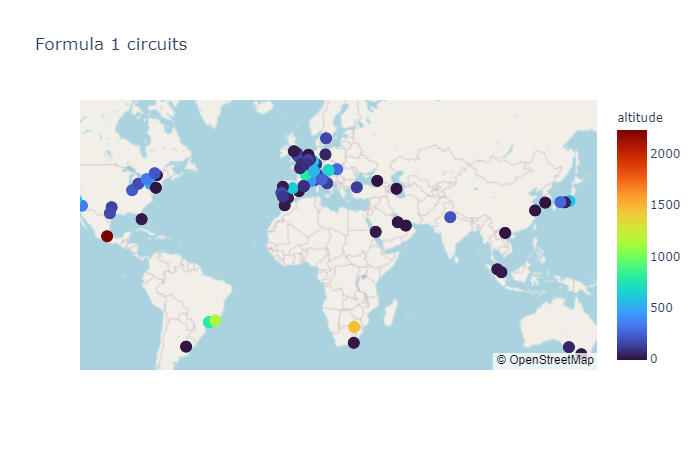

In [7]:
# Example visualization: circuits positions on the glob
fig = px.scatter_mapbox(df, lat='lat', lon='lng', color='alt', 
                        labels={'lat': 'latitude', 'long':'longitude','alt':'altitude'},
                        hover_name='name',
                        hover_data=['location','country'],
                        title='Formula 1 circuits',
                        color_continuous_scale='Turbo',
                        zoom=0.45, center=dict(lon=20,lat=20),
                        mapbox_style="open-street-map")
fig.update_traces(marker={'size': 13})
fig.show("png")

# Races

The `races.csv` file contains information about all the races. An id `raceId` is associated with a circuit (by `CircuitId` and `name`), a date (by `year` and `date`) and a time (69% missing values `"\N"`). Additional informations are also given: the number of rounds `round`.

In [8]:
df = pd.read_csv(os.path.join(root, 'races.csv'))

In [9]:
# Head
df.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [10]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1058 non-null   int64 
 1   year       1058 non-null   int64 
 2   round      1058 non-null   int64 
 3   circuitId  1058 non-null   int64 
 4   name       1058 non-null   object
 5   date       1058 non-null   object
 6   time       1058 non-null   object
 7   url        1058 non-null   object
dtypes: int64(4), object(4)
memory usage: 66.2+ KB


In [11]:
# Basic statistics
df.describe()

,raceId,year,round,circuitId
count,1058.000000,1058.000000,1058.000000,1058.000000
mean,531.231569,1990.780718,8.382798,22.141777
std,308.165709,19.730088,5.000281,17.231430
min,1.000000,1950.000000,1.000000,1.000000
25%,265.250000,1976.000000,4.000000,9.000000
50%,529.500000,1992.000000,8.000000,18.000000
75%,793.750000,2008.000000,12.000000,32.000000
max,1073.000000,2021.000000,23.000000,77.000000


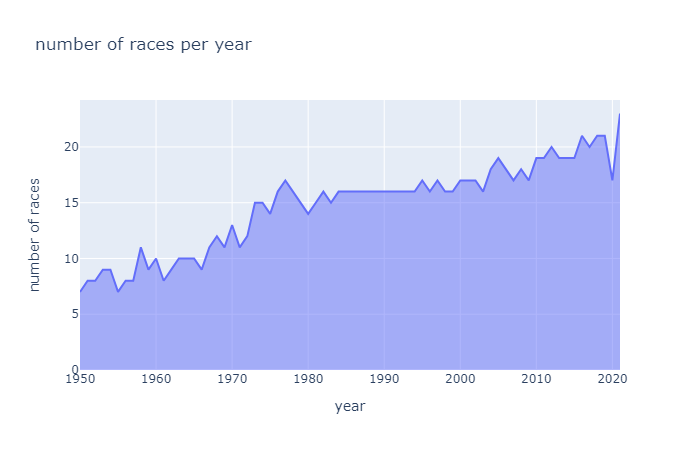

In [12]:
# Example visualization: number of races per year
years = np.sort(df.year.unique())
d = {'year':[],'count':[]}
for year in years:
    count = df[df.year==year].shape[0]
    d['year'].append(year)
    d['count'].append(count)
df_num_races_per_year = pd.DataFrame(d)
fig = px.area(df_num_races_per_year, x='year', y='count', 
        labels={'count': 'number of races'},
        title='number of races per year', 
        hover_data=['count'])
fig.update_layout(hovermode="x unified")
fig.show("png")

# Constructors

The `constructors.csv` file contains information about the constructors. Along with the identifier `constructorId`, a reference name `constructorRef` and the actual name `name` is given. We also are given the nationalities of each constructor through `nationality`.

In [13]:
df = pd.read_csv(os.path.join(root, 'constructors.csv'))

In [14]:
# Head
df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [15]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [16]:
# basic statistics
df.describe()

,constructorId
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


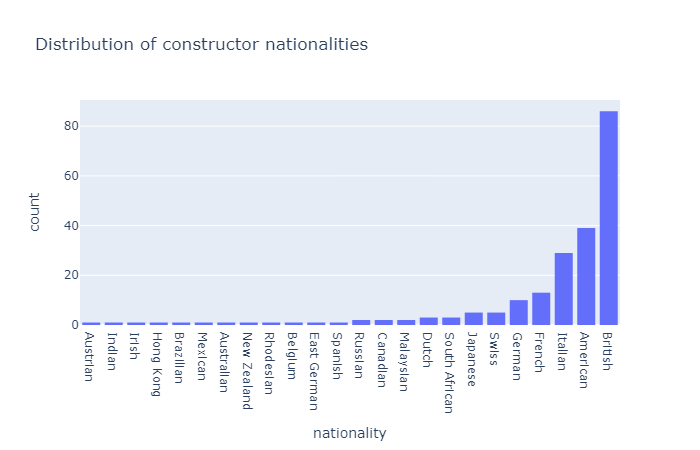

In [17]:
# Example visualization: histogram of nationalities
fig = px.histogram(df, x='nationality', 
                   title='Distribution of constructor nationalities')
fig.update_xaxes(categoryorder='total ascending')
fig.show("png")

# Drivers

The `drivers.csv` file contains informations about the drivers, their name (`forename`, `surname`), a reference name `driverRef`, a 3-letter code `code`, their date of birth `dob` and nationalities.

In [18]:
df = pd.read_csv(os.path.join(root, 'drivers.csv'))

In [19]:
# Head
df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [20]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     853 non-null    int64 
 1   driverRef    853 non-null    object
 2   number       853 non-null    object
 3   code         853 non-null    object
 4   forename     853 non-null    object
 5   surname      853 non-null    object
 6   dob          853 non-null    object
 7   nationality  853 non-null    object
 8   url          853 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.1+ KB


In [21]:
# basic statistics
df.describe()

,driverId
count,853.000000
mean,427.052755
std,246.470876
min,1.000000
25%,214.000000
50%,427.000000
75%,640.000000
max,854.000000


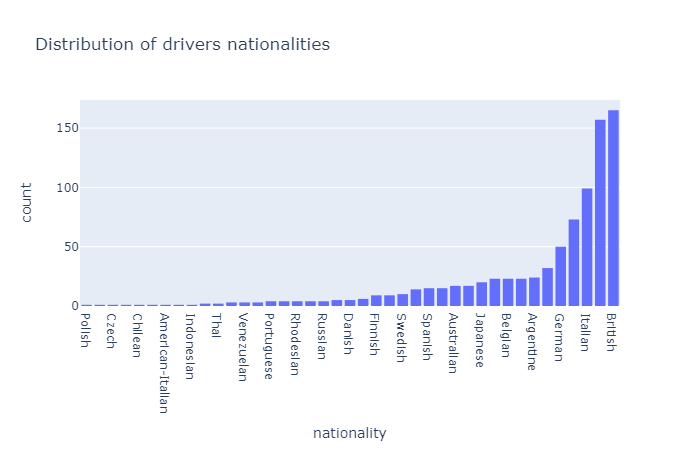

In [22]:
# Example visualization: histogram of nationalities
fig = px.histogram(df, x='nationality', 
                   title='Distribution of drivers nationalities')
fig.update_xaxes(categoryorder='total ascending')
fig.show("png")

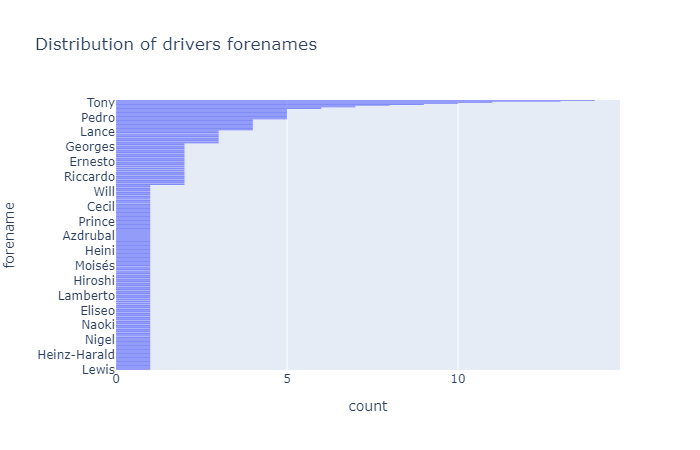

In [23]:
# Example visualization: Histogram of forenames and nationalities
fig = px.histogram(df, y='forename',
                   title='Distribution of drivers forenames')
fig.update_yaxes(categoryorder='total ascending')
fig.show("png")

# Constructor results

The `constructor_results.csv` contains information about the constructors results. It associates a race (`raceId`) with a constructor (`constructorId`) and the number of points `points`. 

In [24]:
df = pd.read_csv(os.path.join(root, 'constructor_results.csv'))

In [25]:
# Head
df.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [26]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740 entries, 0 to 11739
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11740 non-null  int64  
 1   raceId                11740 non-null  int64  
 2   constructorId         11740 non-null  int64  
 3   points                11740 non-null  float64
 4   status                11740 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 458.7+ KB


In [27]:
# Basic statistics
df.describe()

,constructorResultsId,raceId,constructorId,points
count,11740.000000,11740.000000,11740.000000,11740.000000
mean,7801.065077,485.124787,42.279983,3.547913
std,5383.208220,282.904878,54.890959,7.028811
min,1.000000,1.000000,1.000000,0.000000
25%,2935.750000,270.000000,6.000000,0.000000
50%,5870.500000,460.000000,22.000000,0.000000
75%,13271.250000,677.000000,51.000000,4.000000
max,16239.000000,1052.000000,214.000000,66.000000


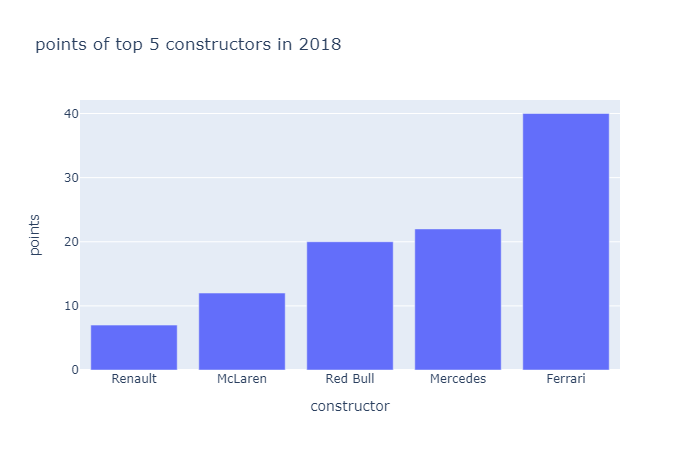

In [28]:
# Example visualization: bar plot of constructor points (greater than mean) for a given year
df_constructors = pd.read_csv(os.path.join(root, 'constructors.csv'))
df_races = pd.read_csv(os.path.join(root, 'races.csv'))
year = np.random.choice(df_races.year.unique())
rid = np.random.choice(df_races.raceId.unique())
d = {
    'points': [],
    'constructor': [],
    'year': [],
}
rid = df_races[df_races.year==year].raceId.values[0]
df_rid = df[df.raceId==rid]
mean = df_rid.points.median()
for cid in df.constructorId.unique():
    constructor = df_constructors[df_constructors.constructorId==cid]['name'].values[0]
    points = df_rid[df_rid.constructorId==cid].points.values.sum()
    if points > mean:
        d['points'].append(points)
        d['constructor'].append(constructor)
        d['year'].append(year)
df_ = pd.DataFrame(d)
df_.sort_values('points', inplace=True)
fig = px.bar(df_, x='constructor', y='points',
             title='points of top {} constructors in {}'\
             .format(df_.constructor.unique().shape[0], year))
fig.show("png")

# Constructor standings

The `constructor_standings.csv` file contains a more detailed description of the constructor results. For each `raceId` and for each `constructorId`, the table gives the number of points `points`, the final position (`position`, `position_text`) and a binary field for winning `win`.

In [29]:
df = pd.read_csv(os.path.join(root, 'constructor_standings.csv'))

In [30]:
# Head
df.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [31]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12506 entries, 0 to 12505
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12506 non-null  int64  
 1   raceId                  12506 non-null  int64  
 2   constructorId           12506 non-null  int64  
 3   points                  12506 non-null  float64
 4   position                12506 non-null  int64  
 5   positionText            12506 non-null  object 
 6   wins                    12506 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 684.0+ KB


In [32]:
# Basic statistics
df.describe()

,constructorStandingsId,raceId,constructorId,points,position,wins
count,12506.000000,12506.000000,12506.000000,12506.000000,12506.000000,12506.000000
mean,15791.892452,495.932592,46.452503,30.766032,7.346394,0.662162
std,8684.449345,278.106963,57.478644,70.797613,4.416912,1.772138
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,8397.250000,286.000000,6.000000,0.000000,4.000000,0.000000
50%,19330.500000,481.000000,25.000000,6.000000,7.000000,0.000000
75%,24010.750000,691.000000,56.000000,28.000000,10.000000,0.000000
max,27682.000000,1052.000000,214.000000,765.000000,22.000000,19.000000


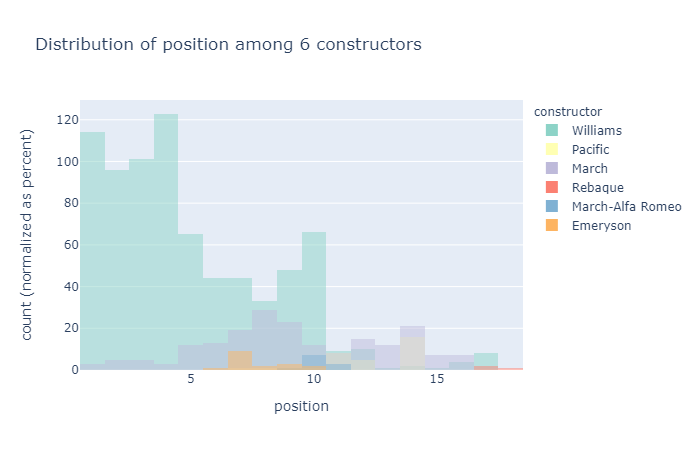

In [33]:
# Example visualization: histogram of positions for N different constructors
N = 6
cids = [np.random.choice(df.constructorId.unique()) for _ in range(N)]
df_constructors = pd.read_csv(os.path.join(root, 'constructors.csv'))
cnames = [df_constructors[df_constructors.constructorId==cid].name.values[0] for cid in cids]
q = ' or '.join([f'constructorId=={cid}' for cid in cids])
df_ = df.query(q)
def f(x):
    for cid, cname in zip(cids, cnames):
        if x['constructorId']==cid:
            return cname
df_['constructor'] = df_.apply(f, axis=1)
fig = px.histogram(df_, x='position', color='constructor',
                   barmode='overlay', barnorm='percent',
                   color_discrete_sequence=px.colors.qualitative.Set3,
                   nbins=30, title='Distribution of position among {} constructors'.format(N),
                   hover_name='constructorId')
fig.show("png")

In [34]:
del df_
del df_constructors

# Driver standings

The `driver_standing.csv`file contains the "palmares" of each driver. For each `raceId` and for each `driverId`, the table gives the number of points `points`, the final position (`position`, `position_text`) and a binary field for winning `win`.

In [35]:
df = pd.read_csv(os.path.join(root, 'driver_standings.csv'))

In [36]:
# Head
df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [37]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32965 entries, 0 to 32964
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  32965 non-null  int64  
 1   raceId             32965 non-null  int64  
 2   driverId           32965 non-null  int64  
 3   points             32965 non-null  float64
 4   position           32965 non-null  int64  
 5   positionText       32965 non-null  object 
 6   wins               32965 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [38]:
# Basic statistics
df.describe()

,driverStandingsId,raceId,driverId,points,position,wins
count,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000
mean,40669.637707,556.021932,294.113241,12.123246,20.198878,0.261216
std,21594.767327,272.449352,255.176541,32.526281,16.558362,0.961327
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,18954.000000,337.000000,84.000000,0.000000,8.000000,0.000000
50%,48689.000000,582.000000,209.000000,1.000000,16.000000,0.000000
75%,57671.000000,783.000000,477.000000,9.000000,26.000000,0.000000
max,70250.000000,1052.000000,854.000000,413.000000,108.000000,13.000000


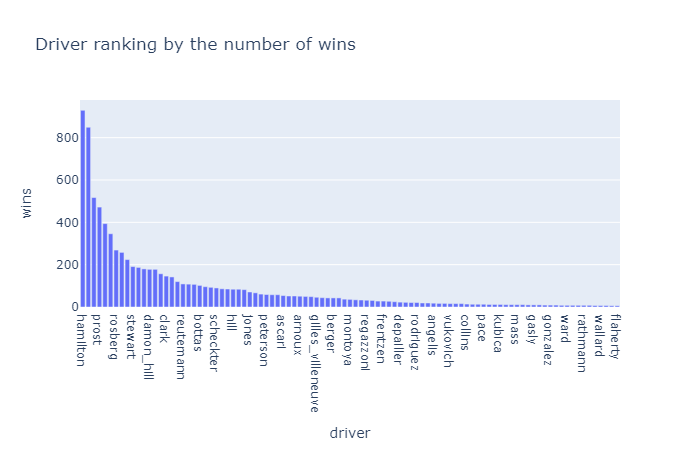

In [39]:
# Example visualization: Ranking of drivers by the number of wins
df_drivers = pd.read_csv(os.path.join(root, 'drivers.csv'))
dids = df.driverId.unique()
def f(x):       
    did = x.driverId
    dname = df_drivers[df_drivers.driverId==did].driverRef.values[0]
    return dname
df_ = df.copy()
df_['driver'] = df_.apply(f, axis=1)
df_.reset_index(inplace=True)
df_ = df_.groupby('driver').sum()
df_.sort_values('wins', ascending=False, inplace=True)
df_ = df_[df_.wins > 5]
df_.reset_index(inplace=True)
fig = px.bar(df_, x='driver', y='wins', title='Driver ranking by the number of wins')
fig.show("png")

# Lap times

The `lap_times.csv` file contains the lap times for each lap `lap`, for each driver `driverId`, for each race `raceId`. It also contains the final position `position` for the (driver, race) tuple.

In [40]:
df = pd.read_csv(os.path.join(root, 'lap_times.csv'))

In [41]:
# Head
df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [42]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491930 entries, 0 to 491929
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        491930 non-null  int64 
 1   driverId      491930 non-null  int64 
 2   lap           491930 non-null  int64 
 3   position      491930 non-null  int64 
 4   time          491930 non-null  object
 5   milliseconds  491930 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 22.5+ MB


In [43]:
# Basic statistics
df.describe()

,raceId,driverId,lap,position,milliseconds
count,491930.000000,491930.000000,491930.000000,491930.000000,4.919300e+05
mean,502.179595,247.421017,29.903277,9.645899,9.555057e+04
std,408.814247,355.215161,18.404813,5.552520,7.165332e+04
min,1.000000,1.000000,1.000000,1.000000,5.540400e+04
25%,117.000000,15.000000,14.000000,5.000000,8.217800e+04
50%,239.000000,31.000000,29.000000,9.000000,9.085200e+04
75%,932.000000,808.000000,44.000000,14.000000,1.025720e+05
max,1052.000000,854.000000,87.000000,24.000000,7.507547e+06


In [44]:
# Example visualization: lap times for a given race of the 
# N first (in terms of position) drivers
df_drivers = pd.read_csv(os.path.join(root, 'drivers.csv'))
df_races = pd.read_csv(os.path.join(root, 'races.csv'))
N = np.random.randint(3, 6)
rid = np.random.choice(df.raceId.unique())
df_ = df[df.raceId==rid]
df_ = df_[df_.position<=N].sort_values('lap')
rounds = df_races[df_races.raceId==rid]['round'].values[0]
all_dids = df_['driverId'].values
df_['driverId'] = [df_drivers[df_drivers.driverId==did_].driverRef.values[0]
                   .replace('_',' ')
                   for did_ in all_dids]
df_ = df_.rename(columns={'driverId': 'driver'})
# ...
df_

,raceId,driver,lap,position,time,milliseconds
457064,1017,hamilton,1,1,1:42.031,102031
457170,1017,leclerc,1,3,1:44.454,104454
457223,1017,max verstappen,1,4,1:45.972,105972
457276,1017,sainz,1,5,1:47.047,107047
457117,1017,bottas,1,2,1:43.115,103115
...,...,...,...,...,...,...
457222,1017,leclerc,53,3,1:34.359,94359
457169,1017,bottas,53,2,1:34.332,94332
457116,1017,hamilton,53,1,1:32.764,92764
457275,1017,max verstappen,53,4,1:35.963,95963


# Pit stops

The `pit_stops.csv` file contains the pit stops information. For each race `raceId`, the pit stop time (`time`, `duration`, `milliseconds`) and lap `lap` of each driver `driverId` is registered.

In [45]:
df = pd.read_csv(os.path.join(root, 'pit_stops.csv'))

In [46]:
# Head
df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [47]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8070 non-null   int64 
 1   driverId      8070 non-null   int64 
 2   stop          8070 non-null   int64 
 3   lap           8070 non-null   int64 
 4   time          8070 non-null   object
 5   duration      8070 non-null   object
 6   milliseconds  8070 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 441.5+ KB


In [48]:
# Basic statistics
df.describe()

,raceId,driverId,stop,lap,milliseconds
count,8070.000000,8070.000000,8070.000000,8070.000000,8.070000e+03
mean,933.297770,477.778067,1.767162,25.114374,5.259363e+04
std,61.766588,395.348040,0.919858,14.341537,1.945088e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,879.000000,17.000000,1.000000,13.000000,2.191400e+04
50%,931.000000,813.000000,2.000000,25.000000,2.347500e+04
75%,982.000000,825.000000,2.000000,35.000000,2.579250e+04
max,1052.000000,854.000000,6.000000,78.000000,2.011266e+06


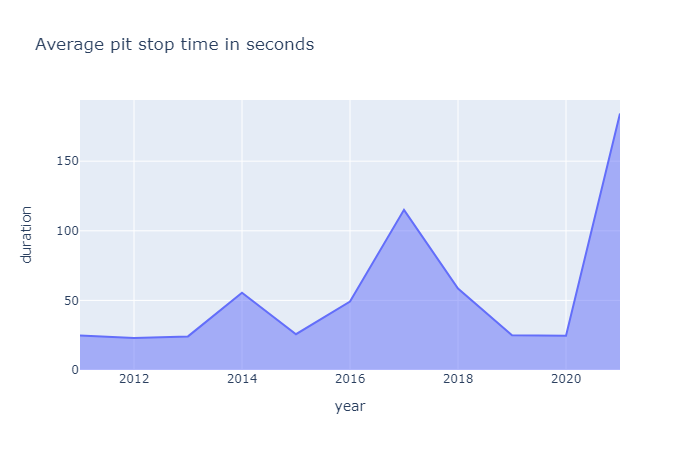

In [49]:
# Example visualization: Evolution of pit stop time over the years
df_races = pd.read_csv(os.path.join(root, 'races.csv'))
df_ = df.join(df_races, on='raceId', lsuffix='_pit_stop', rsuffix='_races')
df_ = df_[['year', 'milliseconds']]
df_['duration'] = df_['milliseconds']/1000
df_ = df_.groupby('year').mean().reset_index()
fig = px.area(df_, x='year', y='duration', title='Average pit stop time in seconds')
fig.update_layout(hovermode="x unified")
fig.show("png")

# Qualifying

The `qualifying.csv` file connects a driver `driverId`, a race `raceId` and a constructor `constructorId` with their qualification results `q1`, `q2`, `q3` and final position `position`. The car number is also given `number`.

In [50]:
df = pd.read_csv(os.path.join(root, 'qualifying.csv'))

In [51]:
# Head
df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [52]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8714 entries, 0 to 8713
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      8714 non-null   int64 
 1   raceId         8714 non-null   int64 
 2   driverId       8714 non-null   int64 
 3   constructorId  8714 non-null   int64 
 4   number         8714 non-null   int64 
 5   position       8714 non-null   int64 
 6   q1             8706 non-null   object
 7   q2             8580 non-null   object
 8   q3             8459 non-null   object
dtypes: int64(6), object(3)
memory usage: 612.8+ KB


In [53]:
# basidc statistics
df.describe()

,qualifyId,raceId,driverId,constructorId,number,position
count,8714.000000,8714.000000,8714.000000,8714.000000,8714.00000,8714.000000
mean,4364.760386,528.022148,264.851848,38.405554,16.97154,11.337618
std,2524.086621,406.931191,360.723669,65.653741,16.57904,6.346699
min,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000
25%,2180.250000,106.000000,15.000000,4.000000,7.00000,6.000000
50%,4358.500000,348.000000,38.000000,9.000000,14.00000,11.000000
75%,6557.750000,939.000000,813.000000,22.000000,21.00000,17.000000
max,8754.000000,1052.000000,854.000000,214.000000,99.00000,28.000000


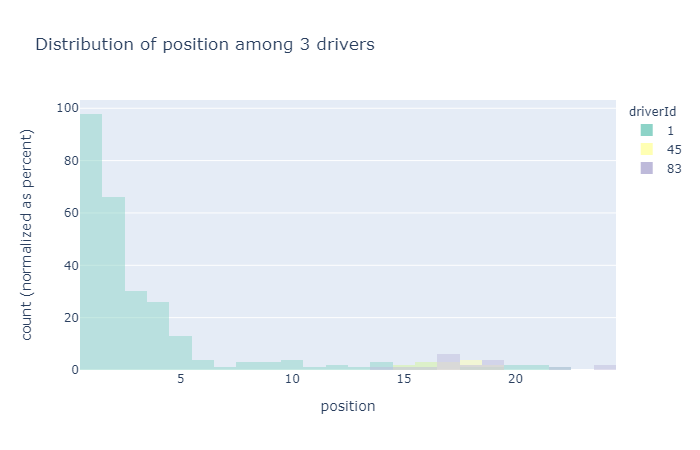

In [54]:
# Example visualization: Histogram of positions for N drivers
N = np.random.randint(3, 10)
dids = list(np.random.choice(df.driverId.unique(), N))
df_ = df.query('driverId in {}'.format(dids))
fig = fig = px.histogram(df_, x='position', color='driverId',
                   barmode='overlay', barnorm='percent',
                   color_discrete_sequence=px.colors.qualitative.Set3,
                   nbins=30, title='Distribution of position among {} drivers'.format(N))
fig.show("png")

 # Results
 
The `results.csv` file connects a driver `driverId`, a race `raceId` and a constructor `constructorId` with their results final position `position`. The car number is also given `number`. The full rank `positionOrder` is also given, along with the number of points `points`, the car number `number` and the position is starting grid `grid`

In [55]:
df = pd.read_csv(os.path.join(root, 'results.csv'))

In [56]:
# Head
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [57]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24980 entries, 0 to 24979
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         24980 non-null  int64  
 1   raceId           24980 non-null  int64  
 2   driverId         24980 non-null  int64  
 3   constructorId    24980 non-null  int64  
 4   number           24980 non-null  object 
 5   grid             24980 non-null  int64  
 6   position         24980 non-null  object 
 7   positionText     24980 non-null  object 
 8   positionOrder    24980 non-null  int64  
 9   points           24980 non-null  float64
 10  laps             24980 non-null  int64  
 11  time             24980 non-null  object 
 12  milliseconds     24980 non-null  object 
 13  fastestLap       24980 non-null  object 
 14  rank             24980 non-null  object 
 15  fastestLapTime   24980 non-null  object 
 16  fastestLapSpeed  24980 non-null  object 
 17  statusId    

In [58]:
# basidc statistics
df.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000
mean,12491.190913,512.755124,246.789151,47.014652,11.217614,12.957806,1.768357,45.711289,17.823058
std,7212.246548,286.830216,254.056417,57.837848,7.283837,7.757771,3.980746,30.082114,26.168563
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6245.750000,285.000000,56.000000,6.000000,5.000000,6.000000,0.000000,21.000000,1.000000
50%,12490.500000,498.000000,158.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000
75%,18735.250000,754.000000,346.000000,57.000000,17.000000,19.000000,2.000000,66.000000,15.000000
max,24985.000000,1052.000000,854.000000,214.000000,34.000000,39.000000,50.000000,200.000000,139.000000


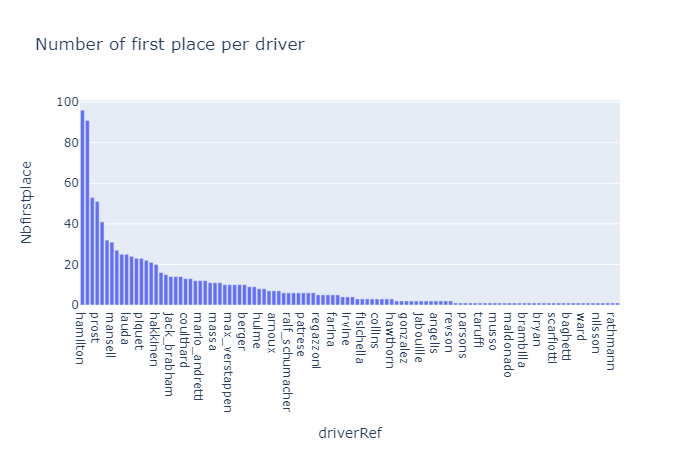

In [59]:
drivers_df = pd.read_csv(os.path.join(root, 'drivers.csv'))
results_df = df
t = results_df['driverId'][results_df['positionOrder']==1].value_counts()
t = t.rename('Nbfirstplace')
u = results_df['driverId'].value_counts()
drivers_df = drivers_df.merge(t,left_on='driverId',right_index=True)
t = t.rename('Ratiofr')
u = u.rename('Ratiofr')
drivers_df = drivers_df.merge(t/u,left_on='driverId',right_index=True)

drivers_df = drivers_df.set_index(drivers_df['forename'] +" "+ drivers_df['surname']).sort_values('Nbfirstplace',  ascending=False)

fig = px.bar(drivers_df, x='driverRef', y='Nbfirstplace',
             title='Number of first place per driver')
fig.show("png")